Total time taken: 10 seconds


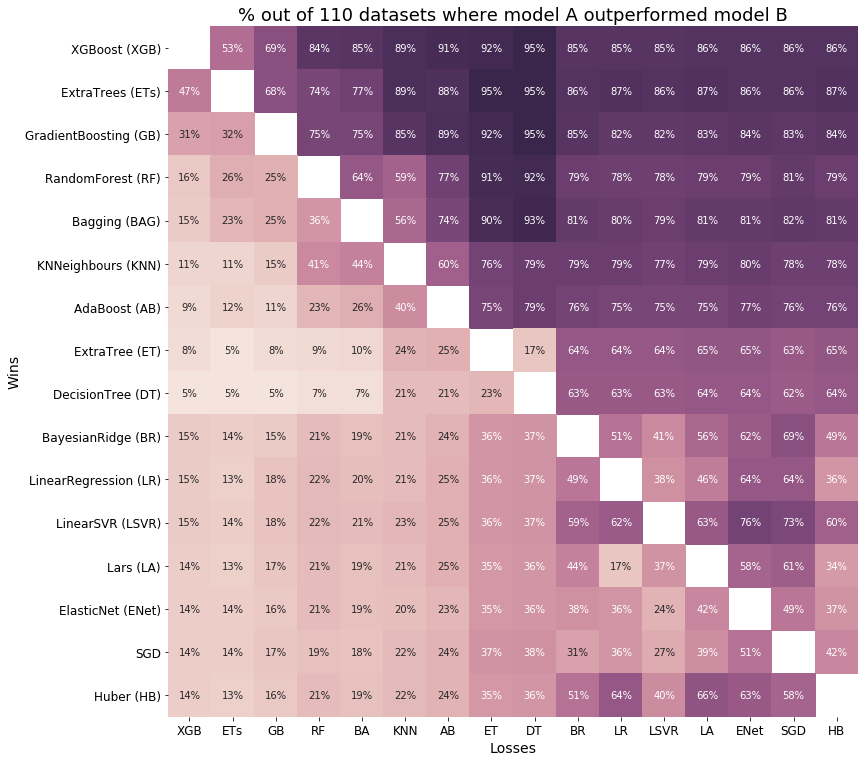

In [2]:
import sys
import time
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import rcParams
import os
import numpy as np
import warnings
import seaborn as sb
import operator

import plotly
import plotly.graph_objs as go
from plotly import tools
import plotly.io as pio


warnings.filterwarnings('ignore')

start_time = time.time()
folder_name = "european_days/"
clf_names_dir = os.listdir(folder_name)

def check_file(f_name):
    for clf in clf_names_dir:
        data_path = folder_name + clf
        files = [f for f in os.listdir(data_path)]
        if f_name not in files:
            return False
            break
    return True

clf_names = list()
r2_dict = dict()
clf_sum_r2 = dict()

for clf in clf_names_dir:
    data_path = folder_name + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    r2_dict[clf] = list()
    for f_name in files:
        if_file_present = check_file(f_name)
        if if_file_present is True:
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            r2_scores.append(mean_test_score.iloc[0])
    r2_dict[clf] = r2_scores
    clf_sum_r2[clf] = np.sum(r2_scores)
    clf_names.append(clf)
    
n_clf = len(clf_names)

sorted_clf = sorted(clf_sum_r2.items(), key=lambda kv: kv[1], reverse=True)
clf_sorted = [a[0] for a in sorted_clf]

model_nice_dict = {
    'XGBoost': 'XGB',
    'ExtraTrees': 'ETs',
    'GradientBoosting': 'GB',
    'RandomForest': 'RF',
    'Bagging': 'BA',
    'KNNeighbours': 'KNN',
    'AdaBoost': 'AB',
    'ExtraTree': 'ET',
    'DecisionTree': 'DT',
    'BayesianRidge': 'BR',
    'LinearRegression': 'LR',
    'LinearSVR': 'LSVR',
    'Lars': 'LA',
    'ElasticNet': 'ENet',
    'SGD': 'SGD',
    'Huber': 'HB'
}

model_nice_dict_y = {
    'XGBoost': 'XGBoost (XGB)',
    'ExtraTrees': 'ExtraTrees (ETs)',
    'GradientBoosting': 'GradientBoosting (GB)',
    'RandomForest': 'RandomForest (RF)',
    'Bagging': 'Bagging (BAG)',
    'KNNeighbours': 'KNNeighbours (KNN)',
    'AdaBoost': 'AdaBoost (AB)',
    'ExtraTree': 'ExtraTree (ET)',
    'DecisionTree': 'DecisionTree (DT)',
    'BayesianRidge': 'BayesianRidge (BR)',
    'LinearRegression': 'LinearRegression (LR)',
    'LinearSVR': 'LinearSVR (LSVR)',
    'Lars': 'Lars (LA)',
    'ElasticNet': 'ElasticNet (ENet)',
    'SGD': 'SGD',
    'Huber': 'Huber (HB)'
}

x_labels = list(model_nice_dict.values())
y_labels = list(model_nice_dict_y.values())

# plot heatmap
performance_datasets = np.zeros(shape=(n_clf,n_clf), dtype=float)

for x, clf_x in enumerate(clf_sorted):
    for y, clf_y in enumerate(clf_sorted):
        x_perf = r2_dict[clf_x]
        y_perf = r2_dict[clf_y]
        n_datasets = len(r2_dict[clf_x])
        x_g_y = len([1 for (a,b) in zip(x_perf, y_perf) if a > b]) / float(n_datasets)
        y_g_x = len([1 for (a,b) in zip(x_perf, y_perf) if b > a]) / float(n_datasets)
        performance_datasets[x][y] = x_g_y
        performance_datasets[y][x] = y_g_x

mask_matrix = []
for x in range(n_clf):
    for y in range(n_clf):
        mask_matrix.append(x == y)
mask_matrix = np.array(mask_matrix).reshape(n_clf, n_clf)

rcParams['font.family'] = "Times New Roman"

plt.figure(figsize=(12, 12))
sb.heatmap(np.round((performance_datasets), 2), fmt='0.0%',
           mask=mask_matrix,
           cmap=sb.cubehelix_palette(500, light=0.95, dark=0.15),
           square=True, annot=True, vmin=0., vmax=1.0,
           xticklabels=x_labels, yticklabels=y_labels, cbar=False)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Losses', fontsize=14)
plt.ylabel('Wins', fontsize=14)
plt.title('% out of ' + str(n_datasets) + ' datasets where model A outperformed model B', fontsize=18)
h = plt.gcf()
plt.tight_layout()
plt.show()

# plot average performance on datasets


end_time = time.time()
print('Total time taken: %d seconds' % int(end_time - start_time))


Processing results for tuning ...
Mean R2 score for ExtraTrees regressor: 0.8051632319699354
Mean R2 score for ElasticNet regressor: 0.4804041528349628
Mean R2 score for DecisionTree regressor: 0.6701100242631342
Mean R2 score for Adaboost regressor: 0.7391551755288891
Mean R2 score for BayesianRidge regressor: 0.485002675641021
Mean R2 score for Huber regressor: 0.4632142008689041
Mean R2 score for XGBoost regressor: 0.815363606204898
Mean R2 score for LinearRegression regressor: 0.4845487947042656
Mean R2 score for GradientBoosting regressor: 0.8006510621581296
Mean R2 score for RandomForest regressor: 0.7747930031474207
Mean R2 score for ExtraTree regressor: 0.6735068163248463
Mean R2 score for Bagging regressor: 0.7701938848980269
Mean R2 score for KNNeighbours regressor: 0.7430745649408463
Processing results for no tuning ...
Mean R2 score for ExtraTrees regressor: 0.7512592276219837
Mean R2 score for ElasticNet regressor: 0.22651823451438774
Mean R2 score for DecisionTree regress

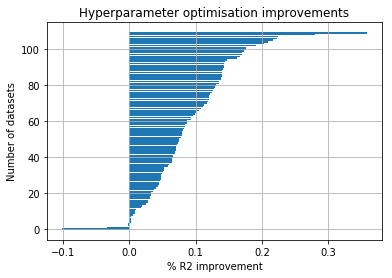

In [28]:
folder_name_tuning = "tuning/"
folder_name_no_tuning = "no_tuning/"
clf_names_dir_tuning = os.listdir(folder_name_tuning)
clf_names_dir_no_tuning = os.listdir(folder_name_no_tuning)

file_obj = open("file_names.txt", "r")
dataset_names = file_obj.read()
dataset_names = dataset_names.split("\n")

clf_names_tuning = list()
clf_mean_r2_tuning = list()
r2_dict_tuning = dict()
fit_time_dict_tuning = dict()

print("Processing results for tuning ...")

for clf in clf_names_dir_tuning:
    data_path = folder_name_tuning + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    common_fileset = list()
    for f_name in files:
        if f_name in dataset_names: 
            common_fileset.append(f_name)
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            r2_scores.append(mean_test_score.iloc[0])
    clf_names_tuning.append(clf)
    r2_dict_tuning[clf] = r2_scores
    print("Mean R2 score for %s regressor: %s" % (clf, np.mean(r2_scores)))


clf_names_no_tuning = list()
clf_mean_r2_no_tuning = list()
r2_dict_no_tuning = dict()
fit_time_dict_no_tuning = dict()

print("Processing results for no tuning ...")

for clf in clf_names_dir_no_tuning:
    data_path = folder_name_no_tuning + clf
    files = [f for f in os.listdir(data_path)]
    r2_scores = list()
    for f_name in files:
        if f_name in dataset_names:
            f_path = data_path + "/" + f_name
            df = pd.read_csv(f_path, sep="\t")
            rank_test_score = df[df["rank_test_score"] == 1]
            mean_test_score = rank_test_score["mean_test_score"]
            r2_scores.append(mean_test_score.iloc[0])
    clf_names_no_tuning.append(clf)
    r2_dict_no_tuning[clf] = r2_scores
    print("Mean R2 score for %s regressor: %s" % (clf, np.mean(r2_scores)))

n_datasets = len(common_fileset)
n_clf = len(clf_names_no_tuning)

clf_datasets_perf = np.zeros(shape=(n_clf, n_datasets), dtype=float)

for x, clf in enumerate(clf_names_no_tuning):
    tuning_perf = r2_dict_tuning[clf]
    no_tuning_perf = r2_dict_no_tuning[clf]
    diff = [(a-b) for a,b in zip(tuning_perf, no_tuning_perf)]
    clf_datasets_perf[x] = diff

mean_perf_datasets = np.mean(clf_datasets_perf, axis=0)

plt.figure()
y_pos = np.arange(n_datasets)
plt.barh(y_pos, sorted(mean_perf_datasets))
plt.xlabel('% R2 improvement')
plt.ylabel('Number of datasets')
plt.title('Hyperparameter optimisation improvements')
plt.grid(True)
plt.show()
